In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')    # To suppress all the warnings in the notebook.
pd.set_option('mode.chained_assignment', None) # To suppress pandas warnings.
np.set_printoptions(precision=4) # To display values only upto four decimal places.

In [3]:
colname=['budget', 'popularity', 'revenue', 'runtime', 'vote_count', 'vote_average']
data=pd.read_csv('D:\IMBD movie dataset\movies_metadata_new.csv', usecols=colname)
data.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0
2,0,11.7129,0.0,101.0,6.5,92.0
3,16000000,3.85949,81452156.0,127.0,6.1,34.0
4,0,8.38752,76578911.0,106.0,5.7,173.0


# Data Understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 6 columns):
budget          45466 non-null object
popularity      45461 non-null object
revenue         45460 non-null float64
runtime         45203 non-null float64
vote_average    45460 non-null float64
vote_count      45460 non-null float64
dtypes: float64(4), object(2)
memory usage: 2.1+ MB


In [5]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 2 categorical variables


In [6]:
# let's inspect at the number of labels for the different categorical variables
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')
print('\nTotal number of rows in the movies dataset: {}'.format(len(data)))

budget  contains  1226  labels
popularity  contains  44177  labels

Total number of rows in the movies dataset: 45466


Budget

In [7]:
print(data['budget'].unique())
budget= data['budget'].value_counts()  # can be converted to integer
print("\nunique lables are:", len(data.budget.unique()))
budget.head()  # 36573 are 0

['30000000' '65000000' '0' ... '3417000' '25868826' '1254040']

unique lables are: 1226


0           36573
5000000       286
10000000      259
20000000      243
2000000       242
Name: budget, dtype: int64

In [8]:
# convert column to numeric

data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
#data['budget'] = data['budget'].replace(0, np.nan)
data['budget'].shape

(45466,)

Popularity

In [9]:
print(data['popularity'].unique())
popularity= data['popularity'].value_counts()  # 
print("\nunique lables are:", len(data.popularity.unique()))
popularity.head(10)

[21.946943 17.015539 11.7129 ... '0.903007' '0.003503' '0.163015']

unique lables are: 44177


0                        34
0.0                      32
1.00E-06                 30
0.0008439999999999999    26
1e-06                    26
0.0005780000000000001    25
0.00022                  24
0.000308                 23
0.0011769999999999999    22
0.000308                 20
Name: popularity, dtype: int64

In [10]:
# convert column to numeric

data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')
data['popularity'] = data['popularity'].replace(0, np.nan)
data['popularity'].shape

(45466,)

Now all our variables are numeric but there are null values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 6 columns):
budget          45463 non-null float64
popularity      45394 non-null float64
revenue         45460 non-null float64
runtime         45203 non-null float64
vote_average    45460 non-null float64
vote_count      45460 non-null float64
dtypes: float64(6)
memory usage: 2.1 MB


In [12]:
data.isnull().sum()

budget            3
popularity       72
revenue           6
runtime         263
vote_average      6
vote_count        6
dtype: int64

In [13]:
print(data['revenue'].unique())
revenue= data['revenue'].value_counts()  # there are 38000+ '0' revenue in our feature
print("\nunique lables are:", len(data.revenue.unique()))
revenue.head(10)

[3.7355e+08 2.6280e+08 0.0000e+00 ... 1.3286e+06 1.2688e+06 1.4130e+06]

unique lables are: 6864


0.0           38052
12000000.0       20
10000000.0       19
11000000.0       19
2000000.0        18
6000000.0        17
5000000.0        14
8000000.0        13
500000.0         13
14000000.0       12
Name: revenue, dtype: int64

In [14]:
data.dropna(how='all', inplace=True, axis=0,thresh=2) 

In [15]:
data.isnull().sum()

budget            0
popularity       66
revenue           0
runtime         257
vote_average      0
vote_count        0
dtype: int64

In [16]:
data.fillna(data.mean(), inplace=True) # filling mean value for popularity and runtime
data.isnull().sum() 

budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64

In [17]:
data = data[~(data == 0).any(axis=1)] # pick only those which are not 0
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5363 entries, 0 to 45422
Data columns (total 6 columns):
budget          5363 non-null float64
popularity      5363 non-null float64
revenue         5363 non-null float64
runtime         5363 non-null float64
vote_average    5363 non-null float64
vote_count      5363 non-null float64
dtypes: float64(6)
memory usage: 293.3 KB


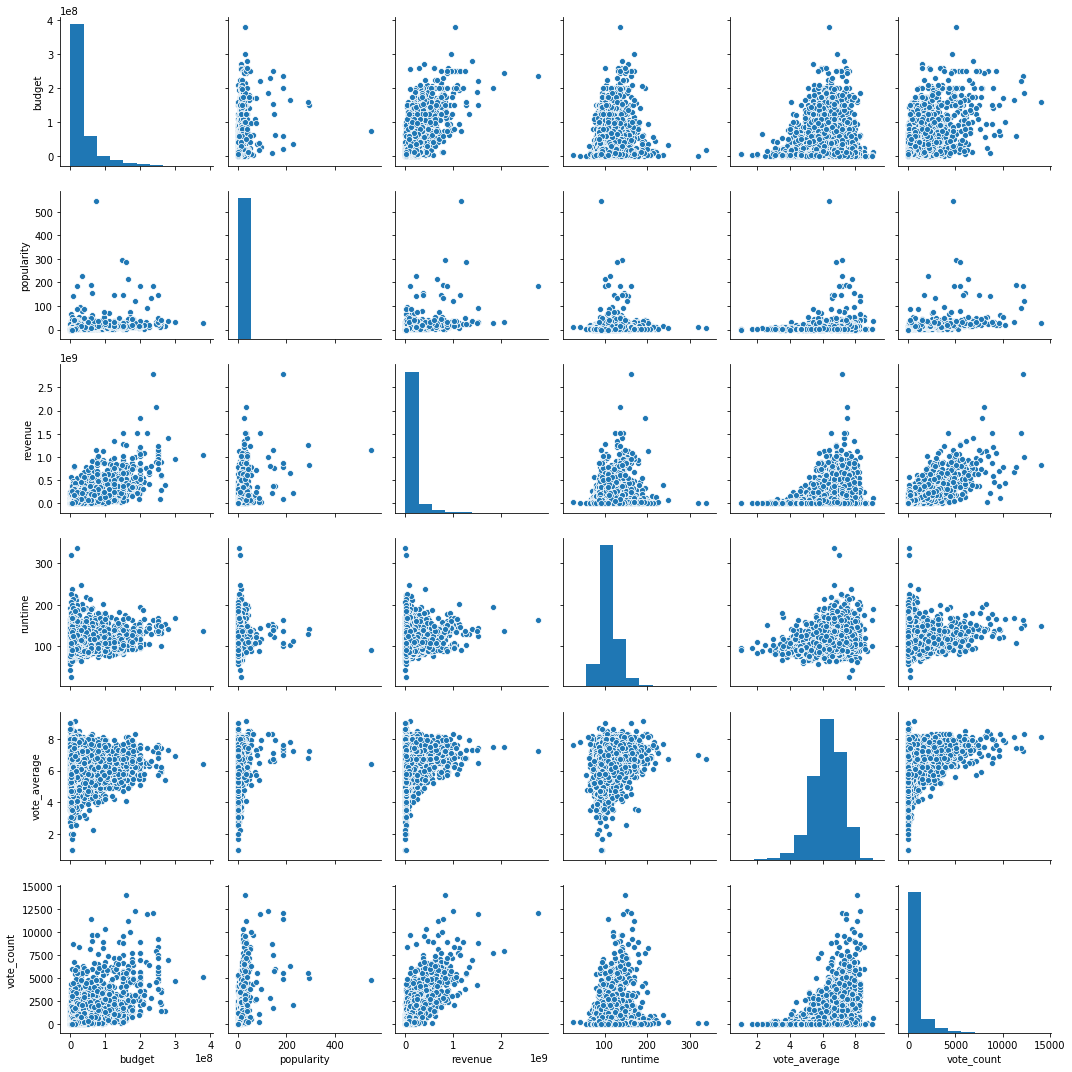

In [18]:
sns.pairplot(data)
plt.tight_layout()
plt.show()

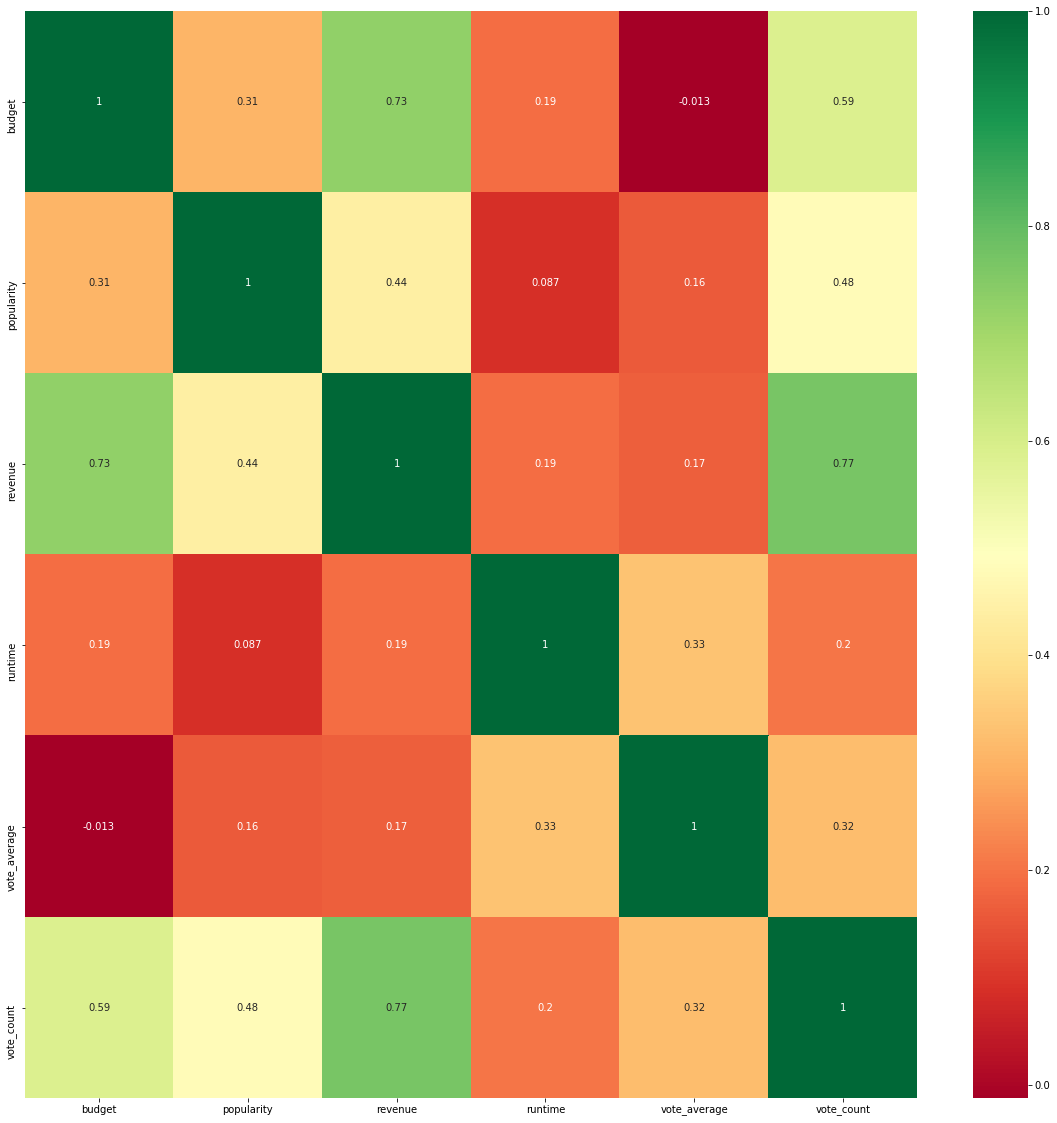

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Observation: Revenue has strong+ve correlation with budget and vote_count

Text(0, 0.5, 'revenue')

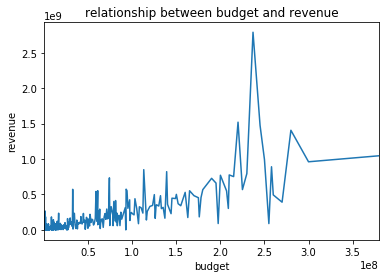

In [20]:
fig = plt.figure()
fig = data.groupby(['budget'])['revenue'].mean().plot()
fig.set_title('relationship between budget and revenue')
fig.set_ylabel('revenue')

Increase in buget has increased the revenue; with budget of 2.4 has got maxminum revenue

Text(0, 0.5, 'vote_count')

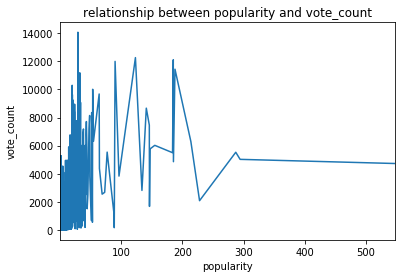

In [22]:
fig = plt.figure()
fig = data.groupby(['popularity'])['vote_count'].mean().plot()
fig.set_title('relationship between popularity and vote_count')
fig.set_ylabel('vote_count')

Text(0, 0.5, 'revenue')

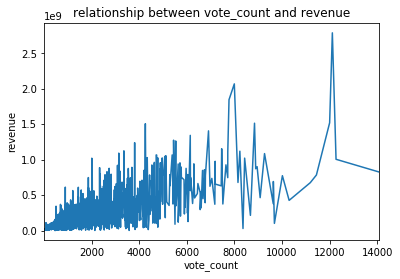

In [45]:
fig = plt.figure()
fig = data.groupby(['vote_count'])['revenue'].mean().plot()
fig.set_title('relationship between vote_count and revenue')
fig.set_ylabel('revenue')

as the vote count increases revenue rises, also a vote_count of 12000 has given maximum revenue

In [46]:
# let's have a look at the most extreme outliers
data[data.vote_count>12000]

,budget,popularity,revenue,runtime,vote_average,vote_count
12481,185000000.0,123.167259,1.004558e+09,152.0,8.3,12269.0
14551,237000000.0,185.070892,2.787965e+09,162.0,7.2,12114.0
15480,160000000.0,29.108149,8.255328e+08,148.0,8.1,14075.0


In [86]:
# seperating the dependent and independant variables
feature_cols = ['budget','popularity','runtime','vote_average','vote_count']
# you want all rows, and the feature_cols' columns
X = data.loc[:, feature_cols]
# now we want to create our response vector
y=data['revenue']
X.head(2)

,budget,popularity,runtime,vote_average,vote_count
0,30000000.0,21.946943,81.0,7.7,5415.0
1,65000000.0,17.015539,104.0,6.9,2413.0


In [87]:
from sklearn.model_selection import train_test_split
# Splitting the data into Train and Test
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=2)
print('The Shape of X_TRAIN is',X_train.shape)
print('The Shape of X_TEST is',X_test.shape)
print('The Shape of Y_TRAIN is',y_train.shape)
print('The Shape of Y_TEST is',y_test.shape)


The Shape of X_TRAIN is (3754, 5)
The Shape of X_TEST is (1609, 5)
The Shape of Y_TRAIN is (3754,)
The Shape of Y_TEST is (1609,)


# selecting the best regression model 

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor #(random_state=42,silent=True)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [37]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('ADA', AdaBoostRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBRegressor(silent=True))) # to silent the WARNING: C:/Jenkins/workspace/xgboost

In [88]:
from sklearn.model_selection import KFold
results_e2 = []
names_e2 = []

for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10, random_state='seed')
    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2.append(cv_results)
    names_e2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -8174476878814322.000000 (1836576528523484.250000)
LASSO: -8174476872856688.000000 (1836576527097394.250000)
RIDGE: -8174475293404744.000000 (1836575705813886.500000)
EN: -8173088507371082.000000 (1836235898525472.500000)
KNN: -10713444120494168.000000 (2699430101314092.500000)
DT: -15431732848714160.000000 (4893754485216154.000000)
SVR: -33123132878876600.000000 (4309942382246683.500000)
ADA: -14048162425083310.000000 (2825414264137477.500000)
RF: -8326202571432485.000000 (2473721540417040.000000)
XGB: -7852984783152813.000000 (1942127402937768.250000)


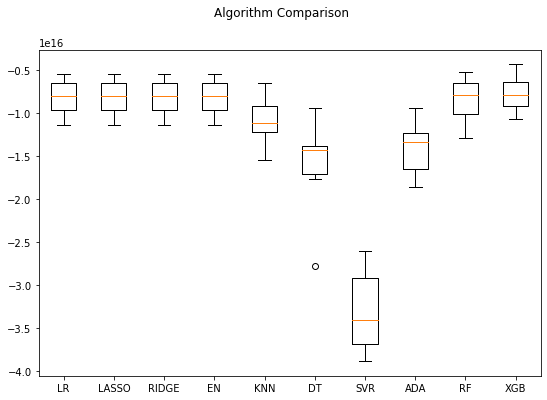

In [89]:
# Plot results
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2)
plt.show()

# XG Boost Regressor

In [109]:
import xgboost as xgb
regressor=XGBRegressor(silent=True) # to silent the WARNING: C:/Jenkins/workspace/xgboo
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [91]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.8578294600002223


In [92]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.6735797312161003


In [93]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
score.mean()

0.6926277771095259

In [110]:
pred=regressor.predict(X_test)

In [112]:
from sklearn import metrics
print('XGB MAE:', metrics.mean_absolute_error(y_test, pred))
print('XGB MSE:', metrics.mean_squared_error(y_test, pred))
print('XGB RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("XGB R-Squared:", metrics.r2_score(y_test, pred))

XGB MAE: 46870256.77501554
XGB MSE: 7730609001708750.0
XGB RMSE: 87923881.86214681
XGB R-Squared: 0.6735797312161003


# Hyperparameter tuning

In [94]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [95]:

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [96]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [97]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor(silent=True) # to silent the WARNING: C:/Jenkins/workspace/xgboost

In [98]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [99]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=  11.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=  10.4s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=  10.1s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=  10.4s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=  10.7s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=  10.2s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  su

[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   6.3s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   6.2s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   5.1s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   5.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   5.1s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample

[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=  13.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=  13.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=  13.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=  11.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=  11.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[CV]  subsample

[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   7.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   7.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   7.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   5.0s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   5.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   5.9s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   1.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   1.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   1.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   1.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  

[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   5.5s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   5.6s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   5.5s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   5.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=  27.2s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[C

[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=  11.7s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=  12.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   2.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   2.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   2.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   5.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   5.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   5.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   4.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   5.4s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_es

[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.6s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   2.3s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   2.2s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   2.4s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   2.1s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=  13.1s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=  13.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=  13.2s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=  14.0s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   8.1s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  su

[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   2.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   2.9s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   5.0s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   5.0s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   5.1s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 68.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                             

In [101]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 15,
 'learning_rate': '0.05'}

In [102]:
xg_random.best_score_

-7257450343958537.0

In [103]:
predictions=xg_random.predict(X_test)

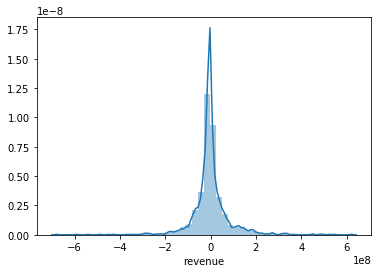

In [104]:
sns.distplot(y_test-predictions)

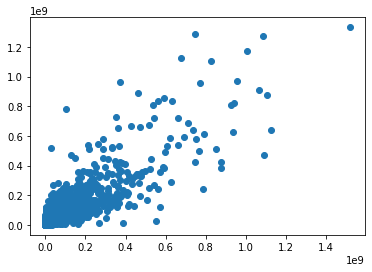

In [105]:
plt.scatter(y_test,predictions)

In [113]:
from sklearn import metrics
print('XGB Regressor with Random Search CV results: ')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R-Squared:", metrics.r2_score(y_test, predictions))

XGB Regressor with Random Search CV results: 
MAE: 46046915.82209447
MSE: 7163983895054831.0
RMSE: 84640320.74050069
R-Squared: 0.6975051321221344


* Observation: out of 45000 rows in the dataset we were able to get only 5000 rows as the budget and revenue were with filled with '0's.
* out of 5000 rows we are able to get R^2 of around .69